# Correlation matrix

Complete data set of immune measures of wild and laboratory mice.
(https://www.nature.com/articles/ncomms14811)

In all column A is the mouse ID shown as Wild Mouse (WM) or Lab Mouse Control (LMC).

(a) Antibodies: immunoglobulins, serum proteins and morphometrics
    In (a) Column B shows the site from where the wild mouse was caught (Supplementary Table 1) or the laboratory mouse strain. All laboratory mouse strains were obtained in Bristol except those labelled as LSHTM which were from the London School of Hygiene and Tropical Medicine. LMC_5-8 are C57BL/6 with an unrecorded, non-immunological genetic manipulation. Column D shows females' pregnancy status where 1 is pregnant and 2 is not pregnant; column E is animals' mass when trapped; column F their age in weeks; column G spleen mass in g, column H the number of viable spleen cells; columns I - N the immunoglobulin and serum protein concentrations that are in concentrations of μg/mL (μg/g for faecal IgA); SAP is serum amyloid P; AAT is alpha-1 antitrypsin.

(b1-3) FACS: splenocyte populations analysed by flow cytometry and
    For (b1) shows median fluorescence index (MFI) of the relevant markers; (b2) the proportionate presence of cellular sub-populations, and row 2 the parent cellular populations from which the other proportionate cellular populations (row 1) were calculated; (b3) the number of cells of different cellular populations. In (b1)-(b3) the row labelled 'Panel' shows the relevant FACS panel as Supplementary Table 6. Where there are an absence of data the reasons are shown as ND - no FACS analysis performed; NC - marker combination not present in this panel / staining; NS – not stained; TFC – too few cells for reliable sub-population analysis; OUT — outlier; NA — other reason.

(c) Cytokines: cytokine responses of in vitro stimulated splenocytes.
    In (c) the cytokine analysed and the stimulation are shown in rows 1 and 2, respectively. Note for the PIC stimulation not all samples were stimulated. Data that were out of range (OOR) are shown as below (<) or above (>) the range; data indicted by * are where the value is extrapolated beyond the limits of the standard curves. OOR< data were set to values of 0.001 for the purposes of quantitative analyses. All concentrations are in pg/mL.

## Comments
##### In Antibodies: (Site/Strain), (Sex), (Pregnant), not inclusive
##### In FACS Frequency: columns (%D+G2Hi+G2Lo+H+), (%D+G2Hi+G2Lo+H-), (%D-G2Hi+G2Lo+H+) and (%D-G2Hi+G2Lo+H-) have been remove because all values are either 0 or missing
##### In Cytokines: "*" replaced by "", ie, the asterisk is ignored; "OOR <" and "OOR >" replaced by 0.001
##### In Cytokines:  this table has not the same number of mice like the other tables. While the other tables (a, b1-3) have 460 wild mice, Cytokines has 237. Adjusting process: if an ID is missing, insert a row with the missing ID number and impute the average value of the available observed data of each respective measure.

## Libraries

In [1]:
import csv
import pprint
import math
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from operator import itemgetter, attrgetter
from graph_tool.all import *
import graph_tool.all as gt

## Loading spreadsheet (CSV)

In [25]:
#datain = 'Antibodies'
#datain = 'FACS_MFI'
#datain = 'FACS_Frequency'
#datain = 'Cytokines'
#datain = 'Cytokines_Adjusted'
#datain = 'All'
#datain = 'abAll'
#datain = 'All_RPMI'
#datain = 'All_CD3CD28'
#datain = 'All_LPS'

#mousetype = 'WM_'
mousetype = 'LM_'
filename = mousetype+datain

in_folder = '/home/elohim/immune_response/data/'
csv_file = in_folder + filename + '.csv'
figfolder = '/home/elohim/immune_response/analysis/figures/' # output figures folder
out_folder = '/home/elohim/immune_response/analysis/tables/' # output table folder

infile = open (csv_file,'r')
table = [row for row in csv.reader(infile)]
infile.close()

## Transform string to float
## Compute columns average
## Impute average values

In [26]:
obs, miss = 0,0
for c in range(0,len(table[0])): # ATENTION! Starting point
    s=[]
    for r in range(1,len(table)): # ATENTION! Starting point
        try:
            table[r][c] = float(table[r][c]) # transfor str to float
            s.append(table[r][c])
            obs += 1
        except:
            miss += 1
            continue
    avg=round(float(np.mean(s)),2) # column average
    for r in range(1,len(table)): # ATENTION! Starting point
        if isinstance(table[r][c],str):
            table[r][c] = avg # impute average into missing values
print('Number of measures:', np.array(table).shape)
print('Total measures:', miss+obs, '\nMissing values:', miss/(miss+obs))

Number of measures: (103, 84)
Total measures: 8568 
Missing values: 0.215452847805789


## Scaled Mass Index (SMI)
#### This procedure scales mice's mass, spleen mass and speen cells according to the scaled mass index method.

In [6]:
# Standardized Major Axis (SMA): scaling exponent
def b_sma(vx,vy):
    x = np.array(vx)
    y = np.array(vy)
    cxy = np.corrcoef(x,y)[0][1]
    varx = np.var(x)
    vary = np.var(y)
    beta = np.sign(cxy)*np.sqrt(vary/varx)
    return beta
    
if datain in ['Antibodies', 'All_RPMI', 'All_CD3CD28', 'All_LPS', 'abAll']:
    
    csv_file = in_folder + mousetype + 'BodyLength.csv'
    infile = open(csv_file,'r')
    bodylength = [row for row in csv.reader(infile)]
    infile.close()
    
    mass=[]
    spleenmass=[]
    spleencells=[]
    L=[]
    for i in range(1,len(table)):
        mass.append(table[i][0])
        spleenmass.append(table[i][2])
        spleencells.append(table[i][3]/1e7)   # Dividing number of spleen cells by a factor
        L.append(float(bodylength[i][0]))
    v = np.array([mass, spleenmass, spleencells])
    L0 = np.mean(L) 
    

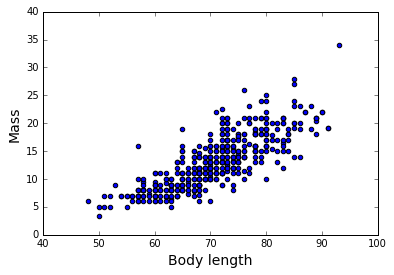

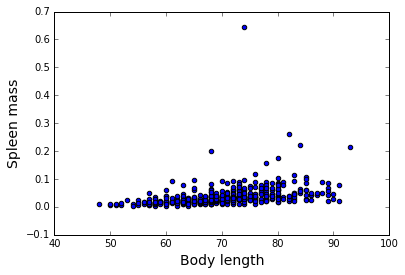

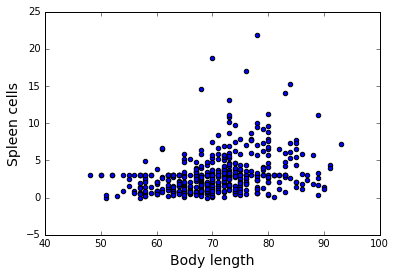

In [20]:
    # Step 1: scatter plots
    bodymeasure=['Mass', 'Spleen mass', 'Spleen cells']
    for m,n in zip(v,bodymeasure):
        plt.figure()
        plt.scatter(L, m)
        plt.xlabel('Body length', fontsize=14)
        plt.ylabel(n, fontsize=14)
        #plt.show()
        plt.savefig(figfolder+mousetype+'SMI_'+n+'.png')
    

In [81]:
    # Step 2 & 3:
    v_smi = []
    for m in v:
        b=b_sma(L,m) # SMA scaling exponent
        mhat = m*(L0/L)**b # SMI
        v_smi.append(mhat)        

     #for i in range(0,3):
     #   print(table[i][0:5])
    #for i in range(0,5):
     #   print(table[i][3])
        
    # Change data to SMI values
    #table_smi = [row[:] for row in table] # make a copy of original table
    table_smi = table # copy the address of original table
    
    table_smi[0][0] = 'Mass (SMI)'
    table_smi[0][2] = 'Spleen mass (SMI)'
    table_smi[0][3] = 'Spleen cells (SMI)'
    
    for i in range(1,len(table_smi)):
        table_smi[i][0]=v_smi[0][i-1]
        table_smi[i][2]=v_smi[1][i-1]
        table_smi[i][3]=1e7*v_smi[2][i-1]
    

In [82]:
    a=3
    b=4
    for i in range(0,10):
        print(table[i][a:b],'\t\t',table_smi[i][a:b])
    print()
    print('Scaling exponent: mass %.2f  / spleen mass %.4f /  spleen cells %.2f' % (b_sma(L,v[0]),b_sma(L,v[1]), b_sma(L,v[2])))
    print('Spleen cells (mean/variance):', np.array(v[2]).mean(), np.array(v[2]).var())
    print('Body length (mean/variance):', np.array(L).mean(), np.array(L).var())
    print()
    print(L[0],L[1])
    print(L0/L[0],L0/L[1])
    print((L0/L[0])**b_sma(L,v[2]),(L0/L[1])**b_sma(L,v[2]))
    print(v[2][0]*(L0/L[0])**b_sma(L,v[2]),v[2][1]*(L0/L[1])**b_sma(L,v[2]))

['Spleen cells (SMI)'] 		 ['Spleen cells (SMI)']
[28875754.896436613] 		 [28875754.896436613]
[32149574.90550852] 		 [32149574.90550852]
[30473352.263307367] 		 [30473352.263307367]
[31042041.169326153] 		 [31042041.169326153]
[31497776.952997375] 		 [31497776.952997375]
[31042041.169326153] 		 [31042041.169326153]
[29944221.577023543] 		 [29944221.577023543]
[30473352.263307367] 		 [30473352.263307367]
[30204147.100646157] 		 [30204147.100646157]

Scaling exponent: mass 0.58  / spleen mass 0.0049 /  spleen cells 0.33
Spleen cells (mean/variance): 3.0950841313021744 7.466252756187522
Body length (mean/variance): 70.62173913043478 67.43952741020794

87.0 63.0
0.8117441279360319 1.1209799861973775
0.9329554116872119 1.0387302426936362
2.887575489643661 3.214957490550852


#### Save SMI table

In [ ]:
# save SMI
out_filename = out_folder + filename + '_SMI.csv'
outfile = open(out_filename,'w')
writer = csv.writer(outfile)
for row in corrmat:
    writer.writerow(row)
outfile.close()

## Pearson Correlation

In [83]:
#data = [row[:] for row in table[1:]] # ATENTION! Starting point
data = table[1:] # removing heading

# computing correlation matrix
corrmat = np.corrcoef(np.array(data),rowvar=False)
print('Correlation matrix size',(corrmat.shape))

Correlation matrix size (86, 86)


## Thresholding

Edge density: 0.176471


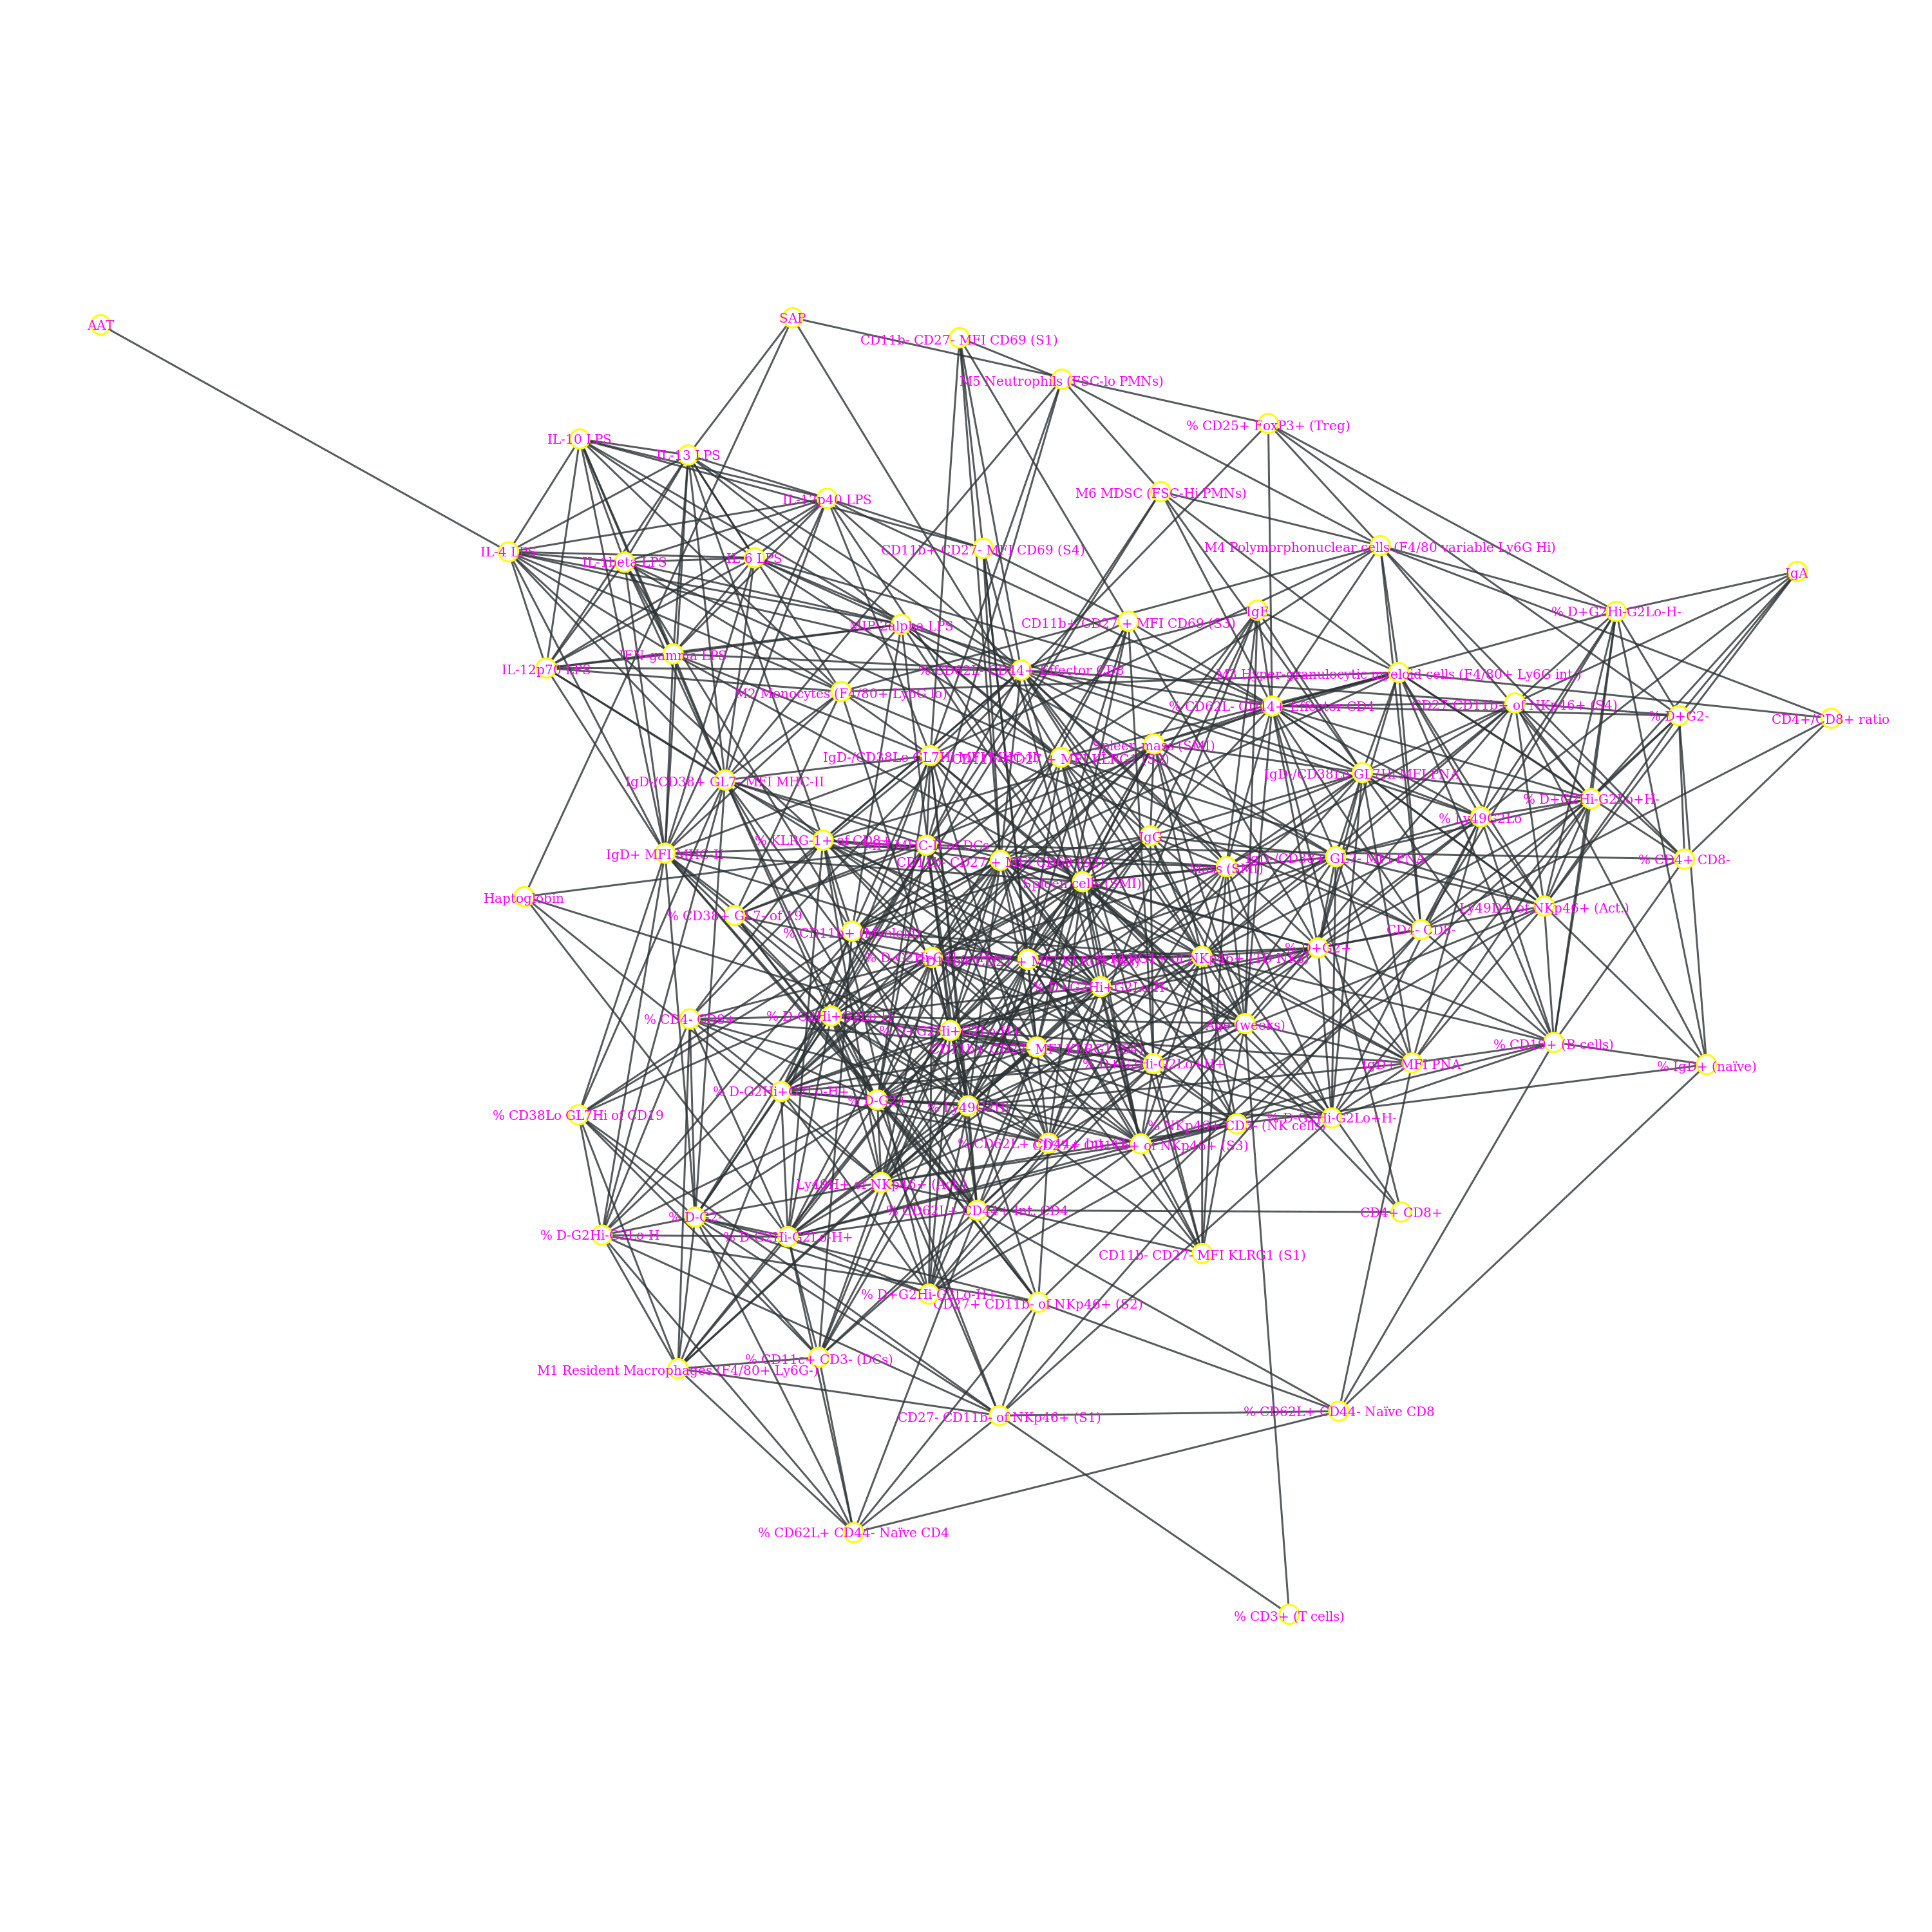

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7efc75b6cf98, at 0x7efc75b61828>

In [87]:
threshold = 0.13
adj = np.zeros(corrmat.shape,int)
for i in range(len(corrmat)):
    for j in range(len(corrmat)):
        if corrmat[i,j] >= threshold:
            adj[i,j] = 1
            adj[j,i] = 1
            adj[i,i] = 0

# Edge density
ed=(np.sum(np.sum(adj)))/((len(adj)-1)*len(adj))
print('Edge density: %g' % ed)

# Creating Graph
adj_labels = table[0]
g = Graph(directed=False)
g.add_edge_list(np.transpose(np.nonzero(np.triu(adj,1))))
vprop_labels = g.new_vertex_property("string")
g.vp.labels = vprop_labels
for v,l in zip(g.vertices(), range(len(adj_labels))):
    g.vp.labels[v] = adj_labels[l]

# Graph visualization
graph_draw(g, 
           vertex_text=g.vp.labels, 
           vertex_color='yellow',
           vertex_fill_color='white', 
           vertex_text_color='magenta',
           vertex_text_position=-0.5,
           vertex_font_size=20, 
           vertex_size=30, 
           output_size=(3000, 3000),
           #output=figfolder+mousetype+data_name+'_graph.png'
          )

## Output Correlation Matrix and Adjacency Matrix

In [88]:


# save immune response labels
immune_labels = table[0] # Immune responses names (heading)
out_filename = out_folder + filename + '_labels.csv'
outfile = open(out_filename,'w')
writer = csv.writer(outfile)
writer.writerow(immune_labels)
outfile.close()

# save adjacency matrix
out_filename = out_folder + filename + '_adj.csv'
outfile = open(out_filename,'w')
writer = csv.writer(outfile)
for row in adj:
    writer.writerow(row)
outfile.close()

# save correlation matrix
out_filename = out_folder + filename + '_corrmat.csv'
outfile = open(out_filename,'w')
writer = csv.writer(outfile)
for row in corrmat:
    writer.writerow(row)
outfile.close()

In [2]:
from infomap import infomap

## End